In [1]:
# use two devices
import os
os.environ['XLA_FLAGS'] = '--xla_force_host_platform_device_count=2'

# use 64-bit on CPU
import jax
jax.config.update('jax_enable_x64', True)
jax.config.update('jax_platform_name', 'cpu')

# configure a simple sharding
from jax.sharding import Mesh, PartitionSpec, NamedSharding
mesh = Mesh(jax.devices(), ('a',))
sharding = NamedSharding(mesh, PartitionSpec('a'))

def f(y):
    return y - jax.lax.map(g, y)

def g(y):
    return y

x = jax.numpy.ones(2)
print(f(x))  # [0. 0.]
print(jax.jit(f)(x))  # [0. 0.]
print(f(jax.device_put(x, sharding)))  # [0. 0.]
print(jax.jit(f)(jax.device_put(x, sharding)))  # error

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


In [2]:
print(f"a")

a


In [3]:
%load_ext autoreload

%autoreload 2

In [4]:
from pathlib import Path

from IMLCV.base.rounds import Rounds
from IMLCV.examples.example_systems import toy_1d
from IMLCV.scheme import Scheme

# folder = Path("perovskites") / "exp_CsPbI3_001"
folder = Path("perovskites") / "exp_ad_fixed_004"
# folder = Path("perovskites") / "exp_ad_002"
rounds = Rounds.create(folder=folder, copy=False, new_folder=False)

ROOT_DIR=PosixPath('/dodrio/scratch/projects/2024_026/IMLCV/src/IMLCV')


c=9 r=2
Plotting, dims: [2] perovskites/exp_CsPbI3_001/cv_9/bias_2.png


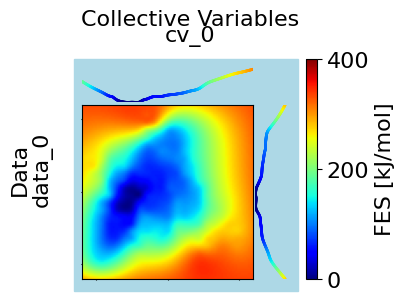

In [7]:
from IMLCV.base.UnitsConstants import kjmol

jax.clear_caches()

rounds.plot_round(
    # c=9,
    # r=2,
    dlo_kwargs=dict(
        only_finished=False,
        ignore_invalid=True,
    ),
    plot_kwargs=dict(
        vmax=100*kjmol,
        margin=0.1,
    ),
    plot_points=False,
)

In [41]:
(143*1000/50)**(1/2)

53.47896782848375

In [56]:
(1000)**(1/2)

31.622776601683793

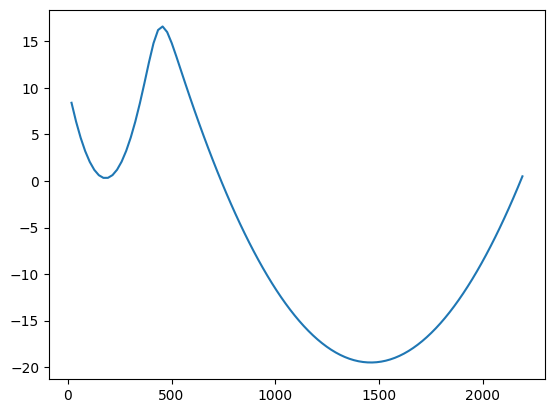

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from IMLCV.base.UnitsConstants import angstrom

r0 = 1.501 * angstrom


x = jnp.linspace(0.1 * (2 * r0) ** 3, 1.5 * (4 * r0) ** 3, 100)


def gauss_3d(v, r0, a=1.0):
    return jnp.exp(-a * ((v - r0**3) / (r0**3)) ** 2) * (jnp.sqrt(a) / (r0**3))


def gauss_3d(v, r0, a=1.0, offset=0.0):
    return jnp.exp(-a * ((v - r0**3) / (r0**3)) ** 2 + jnp.log(jnp.sqrt(a) / (r0**3)) - offset)


def f(V):
    return -5.0 * jnp.log(gauss_3d(V, 2 * r0, 2) + gauss_3d(V, 4 * r0, 16, -5.0)) - 24


plt.plot(x, f(x))

In [6]:
import jax.numpy as jnp

In [ ]:
2 * r0

5.672957854031599

sigma


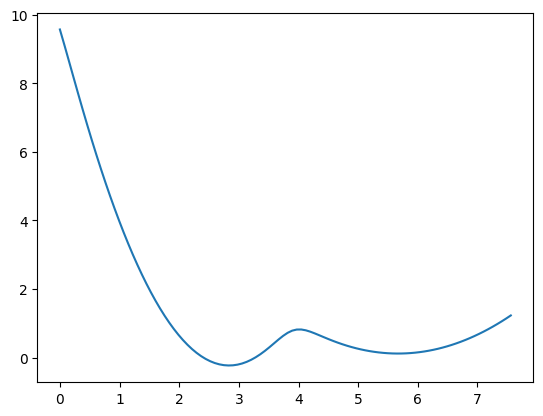

In [ ]:
x = jnp.linspace(0, 4, 100) * angstrom

sigma = 2 ** (-1 / 6)

print(f"sigma")


r0 = 1.5 * angstrom


def f(r):
    def gauss(r, r0, a=1.0):
        return jnp.exp(-a * ((r - r0) / (r0)) ** 2) * (jnp.sqrt(a) / (r0))

    return -0.5 * jnp.log(gauss(r, r0, a=20.0) + gauss(r, 2 * r0, a=20.0))

    # r2 = jnp.sum(r**2)

    # r2_safe = jnp.where(r2 > 1e-7, r2, 1e-7)
    # return  4 * 4.0 * ((sigma**2 / r2_safe) ** 6 - (sigma**2 / r2_safe) ** 3)


plt.plot(x, vmap_decorator(f)(x))

# plt.plot(x, vmap_decorator(jax.grad(f))(x))

In [5]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from pathlib import Path

from IMLCV.examples.example_systems import toy_periodic_phase_trans

md, refs = toy_periodic_phase_trans()


f = Path("perovskites") / "test.h5"
if f.exists():
    f.unlink()

md.trajectory_file = f
refs[0].volume()

Array(182.20503404, dtype=float64)

In [10]:
md.get_energy(md.sp)

EnergyResult(energy=Array(-0.00525226, dtype=float64), gpos=None, vtens=None)

In [6]:
import jax.numpy as jnp

(-1/jnp.log(0.99991528) ) /( -1/jnp.log( 0.99979117))

Array(2.4660223, dtype=float32, weak_type=True)

Array(4787.518, dtype=float32, weak_type=True)

In [12]:
import jax

# with jax.check_tracer_leaks():

md.run(2000)

previous run had 1002 steps, running for additional 998 steps!
      1100|    0.0003|     2.16044118|     0.00000000    1620.67     276.12       34.36| [1083.97872544]
      1200|    0.0003|    13.06467581|     0.00000000   -1056.80     317.00       42.78| [1106.91174489]
      1300|    0.0004|    10.17771571|     0.00000000    1841.14     360.72       48.19| [1023.9599528]
      1400|    0.0004|    21.88953737|     0.00000000     701.59     201.37       53.74| [945.77924045]
      1500|    0.0003|    11.06472247|     0.00000000     274.67     231.11       61.00| [1098.67357536]
      1600|    0.0003|    34.92820886|     0.00000000   -3864.06     272.02       65.57| [1205.86058043]
      1700|    0.0003|    17.97386339|     0.00000000    2839.70     638.99       72.45| [991.41292084]
      1800|    0.0002|    14.72800802|     0.00000000    2326.88     396.30       79.31| [888.12732425]
      1900|    0.0003|    10.31051128|     0.00000000    1321.06     278.28       84.96| [1040.763872

In [25]:
from ase.visualize import view

view(md.sp.canonicalize()[0].to_ase(md.static_trajectory_info).repeat(2), viewer="x3d")

In [175]:
import jax

jax.clear_caches()

In [176]:
sp = md.sp

In [1]:
%load_ext autoreload

%autoreload 2

In [27]:
from IMLCV.implementations.CV import LatticeInvariants, LatticeInvariants2

In [ ]:
import jax
import jax.numpy as jnp


from IMLCV.base.CV import NeighbourList, SystemParams


def get_equival_sp(sp: SystemParams, rng) -> tuple[jax.Array, SystemParams]:
    # check rotational and translationa invariance
    from scipy.spatial.transform import Rotation as R

    key, key2, rng = jax.random.split(rng, 3)

    rot_mat = jnp.array(
        R.random(random_state=int(jax.random.randint(key, (), 0, 100))).as_matrix(),
    )

    M = jnp.eye(3)

    for _ in range(10):
        key2, rng = jax.random.split(rng, 2)
        i = jax.random.randint(key2, (), 0, 3)

        key2, rng = jax.random.split(rng, 2)
        v = jax.random.randint(key2, (3,), -3, 3)

        v = v.at[i].set(0)

        # print(f"{i=}")

        M = M.at[i].add(v @ M)

    # print(f"{M=}")

    # M = jax.random.randint(key2, (3,3),-10,10)

    assert jnp.linalg.det(M) != 0.0

    pos2 = vmap_decorator(lambda a: rot_mat @ a, in_axes=0)(sp.coordinates) + jax.random.normal(key, (3,)) * 5
    cell_r = vmap_decorator(lambda a: rot_mat @ a, in_axes=0)(sp.cell)

    cell_r = M @ cell_r

    sp2 = SystemParams(coordinates=pos2, cell=cell_r)
    return rng, sp2

In [39]:
from IMLCV.examples.example_systems import CsPbI3_refs

In [40]:
refs, _, _ = CsPbI3_refs(2, 2, 2)

In [ ]:
key = jax.random.key(42)


for r in refs:chunk_func(
    # key2, rng = jax.random.split(rng, 2)
    key, r2 = get_equival_sp(r, key)

    cv1, _ = LatticeInvariants2.compute_cv(r)
    cv2, _ = LatticeInvariants2.compute_cv(r)

    print(f"{cv1=} {jnp.linalg.norm(cv1.cv-cv2.cv)=}")

cv1=CV(cv=Array([24.06278406, 24.15160977, 24.16473635,  1.56975024,  1.57028633,
        1.56884316], dtype=float64), mapped=False, atomic=False, _combine_dims=None, _stack_dims=None) jnp.linalg.norm(cv1.cv-cv2.cv)=Array(0., dtype=float64)
cv1=CV(cv=Array([16.32680824, 28.48132928, 30.32672422,  1.56772911,  1.55013295,
        1.55916762], dtype=float64), mapped=False, atomic=False, _combine_dims=None, _stack_dims=None) jnp.linalg.norm(cv1.cv-cv2.cv)=Array(0., dtype=float64)
cv1=CV(cv=Array([18.51224871, 20.49116067, 34.69190018,  1.57049497,  1.56825592,
        1.57050067], dtype=float64), mapped=False, atomic=False, _combine_dims=None, _stack_dims=None) jnp.linalg.norm(cv1.cv-cv2.cv)=Array(0., dtype=float64)


In [17]:
jax.clear_caches()

In [1]:
%load_ext autoreload

%autoreload 

In [2]:
from pathlib import Path

from IMLCV.base.rounds import Rounds
from IMLCV.examples.example_systems import toy_1d
from IMLCV.scheme import Scheme

folder = Path("perovskites") / "CsPbI3_cell"
rounds = Rounds.create(folder=folder, copy=False, new_folder=False)

scheme = Scheme(rounds=rounds)

aah
aah
aah
aah
aah
aah
aah
ROOT_DIR=PosixPath('/dodrio/scratch/projects/2024_026/IMLCV/src/IMLCV')


In [3]:
from IMLCV.base.UnitsConstants import angstrom, kjmol

r_cut = 5.0 * angstrom
N_TRAIN = 32

chunk_size = None
macro_chunk = N_TRAIN * 64  # sampes per worker
macro_chunk_nl = N_TRAIN * 128
samples_per_bin = 40
min_samples_per_bin = 10
T_Scale = 10
koopman = True
eps = 0.10  # 10 percent overlap
max_bias = 100 * kjmol
num_cv_rnds = 2
lag_n = 10
koopman_wham = True
n_max_descriptors = 2
l_max_descriptor = 2
alpha_rematch = 0.5
ncv = 3
min_cv = 2
direct_bias = False

max_cv_basis_fun = 2000

bias_num_points = 1e5
cv_num_points = 1e5
num_sample_rounds = 5


n_max = 2.7e4  # 30**3

max_blocks = 512

In [4]:
import jax
import jax.numpy as jnp

from IMLCV.base.CV import CV, CvTrans
from IMLCV.implementations.CV import LatticeInvariants2, _cv_index, get_sinkhorn_divergence_2, sb_descriptor
from IMLCV.implementations.CvDiscovery import TransformerMAF

print("getting descriptor")

descriptor = sb_descriptor(
    r_cut=r_cut,
    n_max=n_max_descriptors,
    l_max=l_max_descriptor,
    reshape=True,
    reduce=True,
)

rounds = scheme.rounds

dlo_0 = rounds.data_loader(
    cv_round=0,
    start=0,
    weight=False,
    new_r_cut=r_cut,
    time_series=False,
    only_finished=False,
    # lag_n=1,
)

# print(f"{dlo.nl=} {dlo.sp=}")

print("computing soap descriptor")

getting descriptor
aah


/dodrio/scratch/projects/2024_026/IMLCV/micromamba/envs/py312/lib/python3.12/site-packages/jsonpickle/unpickler.py:638: UserWarning: Unpickler._restore_object could not find IMLCV.base.CV.CvFlow!
  warnings.warn('Unpickler._restore_object could not find %s!' % class_name)


iterating low=0 high=2 num=4  start=0 stop=1
padded_vmap done
initializing neighbour list with nn=16 new_nxyz=Array([1., 1., 1.], dtype=float64)
...
setting weights to one!
len(sp) = 3
grid_nums_stack.shape=(3003, 1)
aplying cv func to 1 chunks of size 2000 + remainder of size 1003 
start time: 10:45:05.581.compiled f
compiled chunk func
.recompiled f for last chunk
recompiled chunk func for last chunk

finished at: 10:45:05.780
aplying cv func to 1 chunks of size 2000 + remainder of size 1003 
start time: 10:45:06.226.compiled f
compiled chunk func
.recompiled f for last chunk
recompiled chunk func for last chunk

finished at: 10:45:06.378
selected 3003 out of 3003 data points len(out_reweights)=3 len(out_rhos)=3
gathering data
...
len(out_sp) = 3 
computing soap descriptor


In [5]:
descriptor = sb_descriptor(
    r_cut=r_cut,
    n_max=n_max_descriptors,
    l_max=l_max_descriptor,
    reshape=True,
    reduce=True,
)

aah


In [6]:
descriptor

SerialCvTrans(trans=(CvFun(kwargs={}, static_kwargs={'r_cut': 9.44863066960626, 'chunk_size_atoms': None, 'chunk_size_neigbourgs': None, 'reduce': True, 'reshape': True, 'n_max': 2, 'l_max': 2, 'bessel_fun': 'jax'}, forward=<function _sb_descriptor at 0x153b66f56b60>, backward=None),))

In [10]:
cv_0, _ = dlo_0.apply_cv(
    descriptor,
    x=dlo_0.sp,
    nl=dlo_0.nl,
    macro_chunk=macro_chunk,
    verbose=True,
)

inside _apply
aplying cv func to 1 chunks of size 2048 + remainder of size 955 
start time: 10:49:59.711..
finished at: 10:50:46.981
outside _apply


In [11]:
cv_0

[CV(cv=Array([[[ 1.07609631e-04,  9.98133067e-04, -2.66587693e-04, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 9.10117119e-05,  9.27428426e-04, -1.65979262e-04, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 8.97921831e-05,  8.54053306e-04, -1.87262910e-04, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 1.56139621e-06,  2.00971304e-05, -2.55612526e-06, ...,
           7.58172102e-04, -3.29798909e-03,  3.49573766e-03],
         [ 1.08905653e-06,  1.36035200e-05, -3.16041723e-06, ...,
           1.01095646e-03, -2.40054146e-03,  1.05920327e-03],
         [ 1.31561707e-06,  1.70807321e-05, -2.00724085e-06, ...,
           9.79284240e-04, -2.01662473e-03,  1.00416401e-03]],
 
        [[ 9.99551166e-05,  1.02569940e-03, -1.77259095e-04, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 2.75642643e-04,  2.49455577e-03, -4.36253027e-04, ...,
           0.00

In [16]:
print("sinkhorn div")
tr = get_sinkhorn_divergence_2(
    nli=dlo_0.nl,
    pi=CV.stack(*[a[-1] for a in cv_0]),
    alpha_rematch=alpha_rematch,
    sum_divergence=False,
    ddiv_arg=0,
    normalize=False,
    scale_eps="mean",
    scale=None,
    output="jacrev",
    push_div=False,
)

cv_1, _ = dlo_0.apply_cv(
    tr,
    x=cv_0,
    nl=dlo_0.nl,
    macro_chunk=macro_chunk,
    verbose=True,
)

cv_2 = cv_1


print("computing nonzero elems")

cv_2_stack = CV.stack(*cv_2)

idx = jnp.argwhere(jnp.all(jnp.abs(cv_2_stack.cv) > 1e-10, axis=0))


@vmap_decorator
def f(x):
    return jnp.ravel_multi_index(x, cv_2_stack.shape[1:], mode="wrap")


idx = f(idx)

print(f"{idx.shape=}")

sl = CvTrans.from_cv_function(_cv_index, indices=idx)

cv_3, _ = dlo_0.apply_cv(
    sl,
    x=cv_2,
    macro_chunk=macro_chunk,
    verbose=True,
)

start = 1

if scheme.rounds.cv == 0:
    start = 0

if scheme.rounds.cv == 1:
    start = 1

sinkhorn div
inside _apply
aplying cv func to 1 chunks of size 2048 + remainder of size 955 
start time: 10:54:21.906d=Traced<ShapedArray(float64[])>with<BatchTrace> with
  val = Traced<ShapedArray(float64[3])>with<DynamicJaxprTrace>
  batch_dim = 0
d=Traced<ShapedArray(float64[])>with<BatchTrace> with
  val = Traced<ShapedArray(float64[3])>with<DynamicJaxprTrace>
  batch_dim = 0
d=Traced<ShapedArray(float64[])>with<BatchTrace> with
  val = Traced<ShapedArray(float64[3])>with<DynamicJaxprTrace>
  batch_dim = 0
..
finished at: 10:54:31.590
outside _apply
computing nonzero elems
idx.shape=(120,)
inside _apply
aplying cv func to 1 chunks of size 2048 + remainder of size 955 
start time: 10:54:34.752..
finished at: 10:54:34.981
outside _apply


In [37]:
jnp.linalg.inv(
    jnp.array(
        [
            [
                0,
                1,
                0,
            ],
            [1, 1, 0],
            [1, 1, 1],
        ]
    )
)

Array([[-1.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0., -1.,  1.]], dtype=float64)

In [29]:
tot_flow = (descriptor * tr * sl) + LatticeInvariants2

In [30]:
tot_flow.trans[1]

SerialCvTrans(trans=(CvFun(kwargs={}, static_kwargs={}, forward=<function _lattice_invariants_2 at 0x153b678413a0>, backward=None),))

In [34]:
cv, _ = tot_flow.compute_cv(dlo_0.sp[0], dlo_0.nl)

In [35]:
cv

CV(cv=Array([[3.82479113e-05, 2.99825242e-05, 1.26089412e-05, ...,
        1.52881057e+00, 1.54209078e+00, 1.55499126e+00],
       [7.17699047e-05, 5.87314570e-05, 6.44675417e-05, ...,
        1.56724494e+00, 1.55533423e+00, 1.50408541e+00],
       [9.06695891e-05, 8.10188036e-05, 9.03494739e-05, ...,
        1.56372230e+00, 1.56885741e+00, 1.52161834e+00],
       ...,
       [9.40823415e-05, 4.54585611e-05, 9.32623921e-05, ...,
        1.55313103e+00, 1.52268917e+00, 1.56729612e+00],
       [5.66540403e-05, 7.67561490e-05, 8.51918489e-05, ...,
        1.50651697e+00, 1.54375917e+00, 1.55856825e+00],
       [0.00000000e+00, 1.18205973e-04, 7.25643849e-05, ...,
        1.53939201e+00, 1.56364035e+00, 1.56926631e+00]], dtype=float64), mapped=False, atomic=False, _combine_dims=None, _stack_dims=None)

In [51]:
LatticeInvariants2.compute_cv(refs[0], dlo_0.nl)

(CV(cv=Array([24.06278406, 24.15160977, 24.16473635,  1.56975024,  1.57028633,
         1.56884316], dtype=float64), mapped=False, atomic=False, _combine_dims=None, _stack_dims=None),
 None)

In [45]:
tot_flow

CvFlow(func=CvTrans(trans=(CvFun(cv_input=None, kwargs={}, static_kwargs={'n': 2}, jacfun=<function jacfwd at 0x15012f12b740>, forward=<function _duplicate_trans at 0x14fde2134ae0>, backward=None), CombinedCvFun(classes=((CvFun(cv_input=None, kwargs={}, static_kwargs={'r_cut': 9.44863066960626, 'chunk_size_atoms': None, 'chunk_size_neigbourgs': None, 'reduce': True, 'reshape': True, 'n_max': 2, 'l_max': 2, 'bessel_fun': 'jax'}, jacfun=<function jacfwd at 0x15012f12b740>, forward=<function _sb_descriptor at 0x14ff21271ee0>, backward=None),), (CvFun(cv_input=None, kwargs={}, static_kwargs={}, jacfun=<function jacfwd at 0x15012f12b740>, forward=<function _lattice_invariants_2 at 0x14ff2182c4a0>, backward=None),))))), trans=CvTrans(trans=(CvFun(cv_input=None, kwargs={}, static_kwargs={'n': 2}, jacfun=<function jacfwd at 0x15012f12b740>, forward=<function _duplicate_trans at 0x14fde2134ae0>, backward=None), CombinedCvFun(classes=((CvFun(cv_input=None, kwargs={'nli': NeighbourListInfo(r_cut=